# AnimateDiff

AnimateDiffは既存のStable Diffusionを使いビデオを生成します，これは、text to imageにモーションモジュール層を挿入し、ビデオクリップでトレーニングすることで、動きの優先順位を抽出することによって実現しています．

- ドキュメント:https://huggingface.co/docs/diffusers/main/en/api/pipelines/animatediff

<a href="https://colab.research.google.com/github/fuyu-quant/data-science-wiki/blob/main/multimodal/text_to_video/animatediff.ipynb" target="_blank" rel="noopener noreferrer"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%%capture
!pip install diffusers==0.23.0
!pip install accelerate==0.24.1
!pip install transformers==4.35.0
#!pip install opencv-contrib-python==4.8.0.76
#!pip3 install -U xformers --index-url https://download.pytorch.org/whl/cu118
#!pip install controlnet_aux==0.0.3

In [2]:
import torch
from diffusers import MotionAdapter, AnimateDiffPipeline, DDIMScheduler
from diffusers.utils import export_to_gif

from IPython.display import Image

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

### AnimateDiffのダウンロード

In [3]:
# Load the motion adapter
adapter = MotionAdapter.from_pretrained("guoyww/animatediff-motion-adapter-v1-5-2")

# load SD 1.5 based finetuned model
model_id = "SG161222/Realistic_Vision_V5.1_noVAE"
pipe = AnimateDiffPipeline.from_pretrained(model_id, motion_adapter=adapter)
scheduler = DDIMScheduler.from_pretrained(model_id, subfolder="scheduler", clip_sample=False, timestep_spacing="linspace", steps_offset=1)

# enable memory savings
pipe.enable_vae_slicing()
pipe.enable_model_cpu_offload()

The config attributes {'motion_activation_fn': 'geglu', 'motion_attention_bias': False, 'motion_cross_attention_dim': None} were passed to MotionAdapter, but are not expected and will be ignored. Please verify your config.json configuration file.


Fetching 12 files:   0%|          | 0/12 [00:00<?, ?it/s]

Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

The config attributes {'center_input_sample': False, 'flip_sin_to_cos': True, 'freq_shift': 0, 'mid_block_type': 'UNetMidBlock2DCrossAttn', 'only_cross_attention': False, 'encoder_hid_dim': None, 'attention_head_dim': 8, 'dual_cross_attention': False, 'class_embed_type': None, 'addition_embed_type': None, 'num_class_embeds': None, 'upcast_attention': False, 'resnet_time_scale_shift': 'default', 'resnet_skip_time_act': False, 'resnet_out_scale_factor': 1.0, 'time_embedding_type': 'positional', 'time_embedding_dim': None, 'time_embedding_act_fn': None, 'timestep_post_act': None, 'time_cond_proj_dim': None, 'conv_in_kernel': 3, 'conv_out_kernel': 3, 'projection_class_embeddings_input_dim': None, 'class_embeddings_concat': False, 'mid_block_only_cross_attention': None, 'cross_attention_norm': None, 'addition_embed_type_num_heads': 64} were passed to UNetMotionModel, but are not expected and will be ignored. Please verify your config.json configuration file.


In [4]:
output = pipe(
    prompt=(
        "masterpiece, bestquality, highlydetailed, ultradetailed, sunset, "
        "orange sky, warm lighting, fishing boats, ocean waves seagulls, "
        "rippling water, wharf, silhouette, serene atmosphere, dusk, evening glow, "
        "golden hour, coastal landscape, seaside scenery"
    ),
    negative_prompt="bad quality, worse quality",
    num_frames=16,
    guidance_scale=7.5,
    num_inference_steps=25,
    generator=torch.Generator("cpu").manual_seed(42),
)
frames = output.frames[0]

  0%|          | 0/25 [00:00<?, ?it/s]

In [5]:
frames

[<PIL.Image.Image image mode=RGB size=512x512>,
 <PIL.Image.Image image mode=RGB size=512x512>,
 <PIL.Image.Image image mode=RGB size=512x512>,
 <PIL.Image.Image image mode=RGB size=512x512>,
 <PIL.Image.Image image mode=RGB size=512x512>,
 <PIL.Image.Image image mode=RGB size=512x512>,
 <PIL.Image.Image image mode=RGB size=512x512>,
 <PIL.Image.Image image mode=RGB size=512x512>,
 <PIL.Image.Image image mode=RGB size=512x512>,
 <PIL.Image.Image image mode=RGB size=512x512>,
 <PIL.Image.Image image mode=RGB size=512x512>,
 <PIL.Image.Image image mode=RGB size=512x512>,
 <PIL.Image.Image image mode=RGB size=512x512>,
 <PIL.Image.Image image mode=RGB size=512x512>,
 <PIL.Image.Image image mode=RGB size=512x512>,
 <PIL.Image.Image image mode=RGB size=512x512>]

In [6]:
export_to_gif(frames, "animation.gif")

'animation.gif'

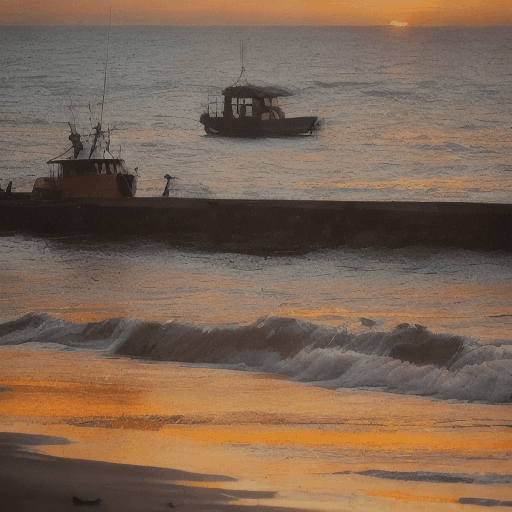

In [7]:
Image(filename="animation.gif")
